In [66]:
# Questions
# Do we do HWE check on gangstr? check chr21:8993159
# Compute MI rate per locus, can filter on that?
# check low MI rate trios
# check sample whose trio we said was missing

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import os
import pandas as pd


path = f"/expanse/projects/gymreklab/helia/ensembl/1000Genomes-TR-Analysis/mend/result/mend_gt_all.tab"
data = pd.read_csv(path, sep="\t", 
    names=["chrom","pos","motif","sample","method","gbs","MI","Score"])

print(len(data[data['MI'] == True]) / len(data))

0.9409127455922673


[0.9320879690092526, 0.9375186958329191, 0.9398487143538489, 0.942046610850776, 0.9451562869549363]
[0.9738957333884777, 0.9777773657851485, 0.9798352852538809, 0.9819371291323932, 0.984379775235749]
[0.9859922108551992, 0.9873411020895939, 0.9882147996327805, 0.9891445077443388, 0.9903085145145173]
[0.9845909048256999, 0.9863782276595753, 0.987447107042267, 0.9885361875301435, 0.9898071199604788]
[0.9722188598314735, 0.9745589455763706, 0.975738642179501, 0.9774571538015615, 0.9796645178044346]
[0.9606805105720444, 0.9622905067145279, 0.9636493517398748, 0.96596717781119, 0.9691095885227294]
[0.9377939505515843, 0.9509648077007993, 0.959941648808448, 0.9670195318324138, 0.9751476501633576]


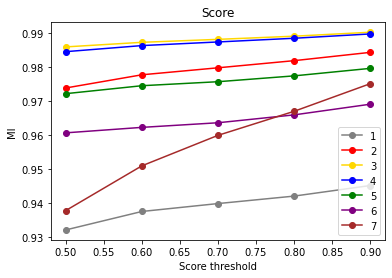

In [2]:
# MI vs. gtscore by period
percolors = ["gray","red","gold","blue","green","purple","brown"]

def PlotByScore(data, scorecol, percolors):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for period in range(1, 8):
        if period < 7:
            pdata = data[data["motif"].apply(len)==period].copy()
        else: pdata = data[data["motif"].apply(len)>=period].copy()
        mis = []
        ns = []
        thresh = np.arange(0.5, 1.0, 0.1)
        for t in thresh:
            mis.append(np.mean(pdata[pdata[scorecol]>=t]["MI"]))
            ns.append(pdata[pdata[scorecol]>=t].shape[0])
        ax.plot(thresh, mis, marker="o", color=percolors[period-1], label=period)
        print(mis)
    ax.set_xlabel("Score threshold")
    ax.set_ylabel("MI")
    ax.set_title(scorecol)
    ax.legend(loc="lower right")
    plt.savefig("Score_MI.pdf", dpi=1200)
    
PlotByScore(data, "Score", percolors)


In [6]:
# by method (advntr|eh|hipstr|gangstr)
by_method = data.groupby(["method"], as_index=False).agg({"MI": np.mean, "sample": len}).sort_values(["MI"], ascending=False)
by_method

,method,MI,sample
12,1|1|0|1,0.993125,4509
11,1|1|0|0,0.990872,986
14,1|1|1|1,0.990566,5088
6,0|1|1|1,0.987742,11564776
5,0|1|1|0,0.987187,4729053
3,0|1|0|0,0.980844,1462535
13,1|1|1|0,0.977594,2544
1,0|0|1|0,0.975185,115385694
4,0|1|0|1,0.968240,966447
10,1|0|1|1,0.950517,21462


In [10]:
bypos = data.groupby(["method","pos","chrom"], as_index=False).agg({"MI": np.mean, "sample": len})

In [12]:
failed_MI = bypos[bypos['MI'] < 0.95]

for i in range(1,23):
    df = failed_MI[failed_MI['chrom'] == f'chr{i}']
    df[['pos']].to_csv(f"failed_MI/failed_MI_chr{i}.txt", sep = "\t", header = False, index = False)
        

,sample,MI,pos
276,HG02683,0.926375,7674
293,HG02776,0.934737,7646
462,NA10843,0.935113,7567
152,HG01683,0.935889,7643
486,NA12739,0.936510,7513


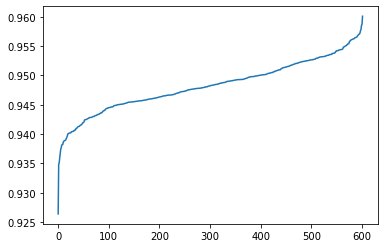

In [78]:
# by sample. check by ancestry
bysample = data.groupby("sample", as_index=False).agg({"MI": np.mean, "pos": len}).sort_values("MI")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(bysample.shape[0]), bysample["MI"])
bysample.head()

In [18]:
full_data

,chrom,pos,motif,sample,method,gbs,MI,Score
0,chr22,11213148,AT,HG01056,0|0|1|0,"0/0,0/0,0/0",True,1.0
1,chr22,11213148,AT,HG01068,0|0|1|0,"0/0,0/0,0/0",True,1.0
2,chr22,11213148,AT,HG01071,0|0|1|0,"0/0,0/0,0/0",True,1.0
3,chr22,11213148,AT,HG01081,0|0|1|0,"0/0,0/0,0/0",True,1.0
4,chr22,11213148,AT,HG01135,0|0|1|0,"0/0,0/0,0/0",True,1.0
...,...,...,...,...,...,...,...,...
376866340,chr1,248916402,A,HG03825,0|0|1|0,"0/0,0/0,-1/0",True,1.0
376866341,chr1,248916402,A,HG04157,0|0|1|0,"0/0,-1/0,0/0",True,1.0
376866342,chr1,248916402,A,NA12801,0|0|1|0,"0/0,0/0,-1/0",True,1.0
376866343,chr1,248916402,A,NA12802,0|0|1|0,"-1/0,-1/0,0/0",True,1.0


In [29]:
ens_gangstr_21 = data[(data['method'] == "0|0|0|1") & (data['chrom'] == "chr21")]
ens_hipstr_21 = data[(data['method'] == "0|0|1|0") & (data['chrom'] == "chr21")]
ens_eh_21 = data[(data['method'] == "0|1|0|0") & (data['chrom'] == "chr21")]
ens_advntr_21 = data[(data['method'] == "1|0|0|0") & (data['chrom'] == "chr21")]
ens_advntr_21['pos'] = ens_advntr_21['pos'] - 1
ens_advntr_21

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,chrom,pos,motif,sample,method,gbs,MI,Score
2338423,chr21,30880125,AAAAAAAAG,HG00594,1|0|0|0,"0/0,-23/0,0/0",True,0.68
2338424,chr21,30880125,AAAAAAAAG,HG01258,1|0|0|0,"-50/0,0/0,0/0",False,0.98
2338425,chr21,30880125,AAAAAAAAG,HG01526,1|0|0|0,"0/0,-41/0,0/0",True,1.00
2338426,chr21,30880125,AAAAAAAAG,HG01681,1|0|0|0,"0/0,0/13,31/0",True,0.81
2338427,chr21,30880125,AAAAAAAAG,HG01881,1|0|0|0,"0/0,0/0,-14/0",True,1.00
...,...,...,...,...,...,...,...,...
4587823,chr21,45504502,AGGCCCCCC,NA20129,1|0|0|0,"-9/-9,-9/-9,-9/-9",True,1.00
4587824,chr21,45504502,AGGCCCCCC,NA20279,1|0|0|0,"-9/-9,0/-9,-9/-9",True,1.00
4587825,chr21,45504502,AGGCCCCCC,NA20358,1|0|0|0,"-9/-9,-9/-9,-9/-9",True,1.00
4587826,chr21,45505371,AGGGGGCCC,HG00423,1|0|0|0,"0/-11,0/-11,0/0",True,1.00


In [30]:
path = f"/gymreklab-tscc/helia/ensembl/1000Genomes-TR-Analysis/mend/result/mend_gt_chr21_gangstr.tab"
gangstr_21 = pd.read_csv(path, sep="\t", 
                names=["chrom","pos","motif","sample","method","gbs","MI","Score"])

path = f"/gymreklab-tscc/helia/ensembl/1000Genomes-TR-Analysis/mend/result/mend_gt_chr21_hipstr.tab"
hipstr_21 = pd.read_csv(path, sep="\t", 
                names=["chrom","pos","motif","sample","method","gbs","MI","Score"])

path = f"/gymreklab-tscc/helia/ensembl/1000Genomes-TR-Analysis/mend/result/mend_gt_chr21_eh.tab"
eh_21 = pd.read_csv(path, sep="\t", 
                names=["chrom","pos","motif","sample","method","gbs","MI","Score"])

path = f"/gymreklab-tscc/helia/ensembl/1000Genomes-TR-Analysis/mend/result/mend_gt_chr21_advntr.tab"
advntr_21 = pd.read_csv(path, sep="\t", 
                names=["chrom","pos","motif","sample","method","gbs","MI","Score"])


shared_gangstr = gangstr_21[gangstr_21['pos'].isin(ens_gangstr_21['pos'])]
shared_hipstr = hipstr_21[hipstr_21['pos'].isin(ens_hipstr_21['pos'])]
shared_advntr = advntr_21[advntr_21['pos'].isin(ens_advntr_21['pos'])]
shared_eh = eh_21[eh_21['pos'].isin(ens_eh_21['pos'])]

In [31]:
print(np.mean(shared_gangstr['sample']), np.mean(ens_gangstr_21['MI']))
print(np.mean(shared_hipstr['method']), np.mean(ens_hipstr_21['MI']))
print(np.mean(shared_eh['sample']), np.mean(ens_eh_21['MI']))
print(np.mean(shared_advntr['sample']), np.mean(ens_advntr_21['MI']))

0.8528335586342976 0.8528335586342976
0.9750044196194085 0.9750044196194085
0.9802992149311213 0.9810250898714005
0.9269796111901375 0.9269796111901375


In [32]:
print(len(shared_gangstr['MI']), len(ens_gangstr_21['MI']))
print(len(shared_hipstr['MI']), len(ens_hipstr_21['MI']))
print(len(shared_eh['MI']), len(ens_eh_21['MI']))
print(len(shared_advntr['MI']), len(ens_advntr_21['MI']))

449029 449029
1566877 1566877
27004 26983
2109 2109
